# Exercice 1: Historic Ciphers

## PART A: Ciphers

### A.1 Setup

Useful libraries:
file encoding/decoding [`unicodedata`](https://docs.python.org/2/library/unicodedata.html)
, [`string`](https://docs.python.org/2/library/string.html)
, regular expressions [`re`](https://docs.python.org/2/library/re.html)
, [`random`](https://docs.python.org/2/library/random.html)
, [`math`](https://docs.python.org/2/library/math.html)
, [`numpy`](https://www.numpy.org/)
, [`matplotlib`](https://matplotlib.org/)

In [ ]:
import unicodedata, string, re, random, math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def convert(s):
    "Convert the string 's', supposed to be encoded in UTF-8, into a very simple one."
    tmp1 = unicodedata.normalize('NFKD', s) # decode the input string
    tmp2 = tmp1.encode('ASCII', 'ignore').decode('utf8') # convert it to ASCII (remove accents) and to UTF8
    tmp3 = re.sub('[\W\d_]+', ' ', tmp2) # convert non-[a-zA-Z] chars into 1 space
    tmp4 = re.sub('^\s*|\s*$', '', tmp3) # remove leading/trailing spaces
    tmp5 = tmp4.upper() # convert to upcase
    return tmp5

In [ ]:
# test convert
for s in ["abcxyz -_ 0129 ABCXYZ", "A,;.!?\"`'A", "àâÀÂçÇéèëêÉÈËÊïîÏÎôÔùüûÙÜÛ"]:
    print(convert(s))

ABCXYZ ABCXYZ
A A
AAAACCEEEEEEEEIIIIOOUUUUUU


In [ ]:
def read_file(filename):
    "Read the text in 'filename' and convert it into a very simple, but possibly large, string."
    res = []
    with open(filename, 'r', encoding='utf8') as f:
        for l in f:
            line = convert(l)
            if line: # do not append empty lines
                res.append(line)
    return ' '.join(res)

In [ ]:
nemo = read_file('texts/jules_verne__vingt_mille_lieues_sous_les_mers_ch1.txt')
print(nemo[:200])

CHAPITRE PREMIER UN ECUEIL FUYANT LANNEE FUT MARQUEE PAR UN EVENEMENT BIZARRE UN PHENOMENE INEXPLIQUE ET INEXPLICABLE QUE PERSONNE NA SANS DOUTE OUBLIE SANS PARLER DES RUMEURS QUI AGITAIENT LES POPULA


Alphabet translation can be easly managed using the `translate` function from the `str` class. It uses a translation table generated by the `maketrans` related function.

See the documentation:
```python
help(str.translate)
help(str.maketrans)
```

In [ ]:
tbl_example = str.maketrans('ABCDEF', '012345')
'ABCDEFGHIKL'.translate(tbl_example)

'012345GHIKL'

In the `string` module there are predefined alphabets.

In [ ]:
for a in [string.ascii_uppercase, string.ascii_lowercase, string.ascii_letters, string.digits, string.printable]:
    print(a)

ABCDEFGHIJKLMNOPQRSTUVWXYZ
abcdefghijklmnopqrstuvwxyz
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
0123456789
0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [ ]:
alpha = string.ascii_uppercase
alphaws = string.ascii_uppercase + ' '    # alphabet with space char

In [ ]:
arrival = 'ARRIVAL AT FIVE IN PARIS'   # course example

### A.2 Caesar Cipher

**QUESTION**: implement the Caesar method using the skeleton below and test it on a few examples.

In [ ]:
def cshift(s, n):
    "Circular shift of string 's' by 'n' positions to the left."
    return s[n:] + s[:n]

def substitution_encrypt(s, table):
    "Encrypt string 's' using substitutions from translation 'table'."
    return s.translate(table)

In [ ]:
clear_text = "123TEST"

alphabet = string.ascii_uppercase + ' '
encrypt_alpha=cshift(alphabet, 5)
sub_table = str.maketrans(alphabet, encrypt_alpha)
encrypted_text = substitution_encrypt(clear_text, sub_table)

print(encrypted_text)




123YJXY


**QUESTION**: how the decryption can be performed easily?

In [ ]:
sub_table_decrypt = str.maketrans(encrypt_alpha, alphabet)
decrypted_text = substitution_encrypt(encrypted_text, sub_table_decrypt)

print(decrypted_text)

123TEST


In [ ]:
### A.3 Substitution Ciphering with a Random Permutation

**QUESTION**: implement the random permutation/shuffle of the alphabet and use it accordingly to the skeleton below and test it on a few examples.


In [ ]:
import random
def shuffle(s):
    "Randomly shuffle string 's'."
    alphabet = string.printable
    alphabet_list = list(string.printable)
    random.shuffle(alphabet_list)
    shuffled_alphabet = ''.join(alphabet_list)
    print("Old alphabet: ")
    print(alphabet)
    print("New alphabet: ")
    print(shuffled_alphabet)
    sub_table_shuffle = str.maketrans(alphabet, shuffled_alphabet)
    encr_text = substitution_encrypt(s, sub_table_shuffle)
    print("Encrupted text: ")
    print(encr_text)
    pass

In [ ]:
clear_text = "123TEST123"
shuffle(clear_text)


Old alphabet: 
0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

New alphabet: 
OsX-tV:CbevTDF=%"
/$o6za{_xIq)iH590U!~[&Jj,1#.;Rkf
Encrupted text: 
hpN:SV:hpN


### A.4 Vigenère Cipher

**QUESTION**: Model the Vigenère table using a dict of dict in order to write something like `vigenere['key char']['plain text char']  -> 'cipher text char'`. Write an encryption function using the skeleton below and test it on a few examples.


In [ ]:
import string
def cshift(s, n):
    "Circular shift of string 's' by 'n' positions to the left."
    return s[n:] + s[:n]
def vig_table():
    "Returns the Vigenère table using the format vigenere['key char']['plain text char']  -> 'cipher text char'"
    v = {}
    a = string.ascii_uppercase
    for k in string.ascii_uppercase:
        v[k] = {}
        for p in string.ascii_uppercase:
            v[k][p] = a[0]
            a = cshift(a, 1)
        a = cshift(a, 1)
    return v

def vig_table_inv():
    "Returns the Vigenère table using the format vigenere['key char']['cipher text char']  -> 'plain text char'"
    v = {}
    a = string.ascii_uppercase
    for k in string.ascii_uppercase:
        v[k] = {}
        for p in string.ascii_uppercase:
            v[k][a[0]] = p
            a = cshift(a, 1)
        a = cshift(a, 1)
    return v
def vig_encrypt(s, key, tbl):
    "Encrypt the string 's' using Vigenère cipher and 'key' and table 'tbl'."
    res_string = ""
    key_lenght = len(key)
    k = 0
    for char in s:
        try:
            res_string += tbl[key[k % key_lenght]][char]
        except:
            res_string += char
        k += 1
    return res_string

In [ ]:
key = "USIQ"
plaintext = "CI AO"
enc = vig_encrypt(plaintext,key, vig_table())
print(enc)

WA QI


**QUESTION**: how the decryption can be performed easily?

In [ ]:
dec = vig_encrypt(enc,key, vig_table_inv())
print(dec)

CI AO


### A.5 Basic Transposition Cipher

**QUESTION**: implement the first transposition cipher presented during the course using the skeleton below.

*Hints*:

- use a Numpy array to store a matrix of letters (`dtype=np.dtype('S1')`).
- in a first time, assume that there are no duplicates in the key word.

```python
def str2positions(s):
    "Generate the list of positions of chars in alphabetic order from the string 's'."
    pass

def str2matrix(s, lines, columns, padding=' '):
    """Transform the string 's' into a Numpy matrix with ('lines', 'columns') char elements
    and 'padding' char for all non specified elements after the end of 's'."""
    pass

def matrix2str(m):
    "Transform the matrix 'm' into a string by reading 'm' line by line."
     pass
    
def transposition_encrypt(s, key, padding=' '):
    "Encrypt the string 's' using a tranposition with the secret 'key' composed of unique letters."
    pass

def transposition_decrypt(s, key):
    "Decrypt string 's' using a transposition with the secret 'key' composed of unique letters."
    pass
```

In [ ]:
import numpy as np
import math
def str2positions(s):
    "Generate the list of positions of chars in alphabetic order from the string 's'."
    alphaws =  string.ascii_uppercase + ' '
    pos_list = []
    for c in s:
        pos = list(alphaws).index(c)
        pos_list.append(pos)
    pos_list = np.argsort(pos_list)

def str2matrix(s, lines, columns, padding=' '):
    """Transform the string 's' into a Numpy matrix with ('lines', 'columns') char elements
    and 'padding' char for all non specified elements after the end of 's'."""
    strArr = np.empty((lines, columns), dtype=np.dtype('S1'))
    strArr.fill(padding)
    char_per_line = columns
    i = 0
    line = 0
    for l in range(lines):
        k = 0
        for c in s[i:i+char_per_line]:
            strArr[line][k] = c
            k += 1
        i += char_per_line
        line += 1
    return strArr

def matrix2str(m):
    "Transform the matrix 'm' into a string by reading 'm' line by line."
    res = ""
    for r in m:
        for c in r:
            res+= c.decode("utf-8")
    return res

def transposition_encrypt(s, key, padding=' '):
    "Encrypt the string 's' using a tranposition with the secret 'key' composed of unique letters."
    print(1)
    pass

def transposition_decrypt(s, key):
    "Decrypt string 's' using a transposition with the secret 'key' composed of unique letters."
    print(1)
    pass

In [ ]:
matrix2str(str2matrix("DCABWE",2,3))

'DCABWE'

## PART B: Attacks based on Frequency Analysis

Use the `Counter` container from the `collections` module [doc](https://docs.python.org/2/library/collections.html).

*Hint*: a `Counter` can be updated to add entries without any letters counted using `Counter.update({c:0 for c in alphaws})`.


### B.1 Setup

In [ ]:
from collections import Counter
# help(Counter)

In [ ]:
ref_fr = read_file('texts/arthur_conan_doyle__le_chien_des_baskervilles_ch1.txt')
ref_en = read_file('texts/arthur_conan_doyle__the_hound_of_the_baskervilles_ch1.txt')
ref_es = read_file('texts/arthur_conan_doyle__el_sabueso_de_los_baskerville_ch1.txt')
cnt_ref_fr, cnt_ref_en, cnt_ref_es = Counter(ref_fr), Counter(ref_en), Counter(ref_es)

In [ ]:
alice = read_file('texts/lewis_caroll__alice_au_pays_des_merveilles.txt')
disparition = read_file('texts/georges_perec__la_disparition_extrait.txt')
curieux = read_file('texts/jacques_arago__curieux_voyage_autour_du_monde.txt')

In [ ]:
def plot_distributions(ld, ll):
    """Plot the distributions of letters frequencies in the list 'ld'.
    Each distribution should be a 'Counter' object.
    They all should have the same alphabet.
    """
    plt.figure(figsize=(15, 5))
    alphabet = sorted(ld[0].keys())
    width = 0.8/len(ld)
    shift = -0.4 + width/2
    bar = [None] * len(ld)
    x = np.arange(len(alphabet)) # positions of letters
    for i, counter in enumerate(ld):
        n = sum(counter.values()) # total number of letters
        y = np.array([float(v)/float(n) for (x,v) in sorted(counter.items())]) # nb occurrences of letters
        bar[i] = plt.bar(x + shift, y, width=width)
        shift += width
    plt.legend(bar, ll)
    xt = ["{}".format(c) for c in alphabet] # letter labels
    plt.xticks(x, xt)
    plt.rcParams.update({'font.size': 14})
    plt.grid()
    plt.show()

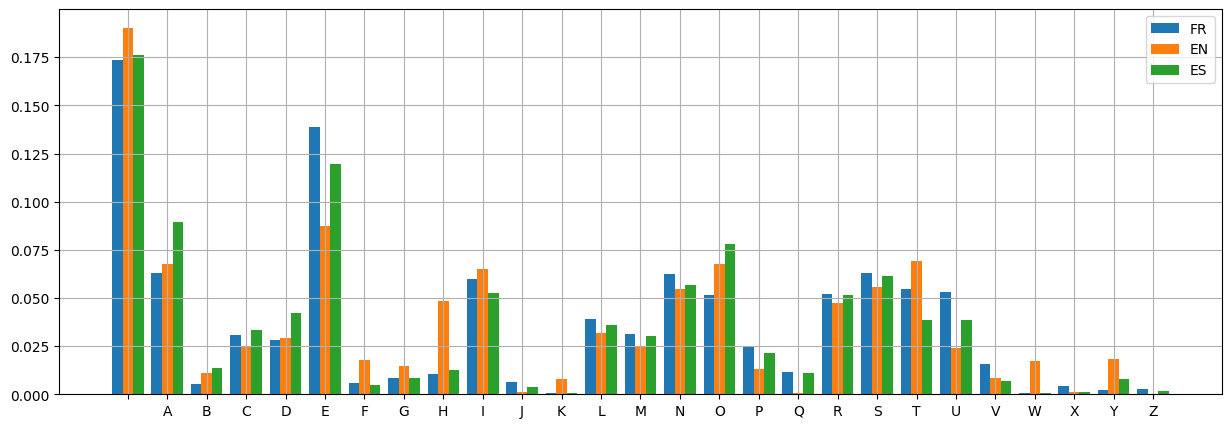

In [ ]:
plot_distributions([cnt_ref_fr, cnt_ref_en, cnt_ref_es], ['FR', 'EN', 'ES'])

### B.2 Manual Attack against Caesar Cipher

**QUESTION**: perform a manual (/visual) attack against Caesar cipher using frequency distributions.

In [ ]:
def enc_attack(clear_text):
  alphabet = string.ascii_uppercase + ' '
  encrypt_alpha=cshift(alphabet,4)
  sub_table = str.maketrans(alphabet, encrypt_alpha)
  encrypted_text = substitution_encrypt(clear_text, sub_table)
  print(clear_text[:500])
  print(encrypted_text[:500])

  most_common = Counter(encrypted_text).most_common()[0][0]
  shift_factor = alphabet.find(most_common) + 1
  encrypt_alpha=cshift(alphabet, shift_factor)
  sub_table_decrypt = str.maketrans(encrypt_alpha, alphabet)
  decrypted_text = substitution_encrypt(encrypted_text, sub_table_decrypt)
  print(decrypted_text[:500])
enc_attack(ref_en)

THE HOUND OF THE BASKERVILLES BY ARTHUR CONAN DOYLE CHAPTER I MR SHERLOCK HOLMES MR SHERLOCK HOLMES WHO WAS USUALLY VERY LATE IN THE MORNINGS SAVE UPON THOSE NOT INFREQUENT OCCASIONS WHEN HE STAYED UP ALL NIGHT WAS SEATED AT THE BREAKFAST TABLE I STOOD UPON THE HEARTH RUG AND PICKED UP THE STICK WHICH OUR VISITOR HAD LEFT BEHIND HIM THE NIGHT BEFORE IT WAS A FINE THICK PIECE OF WOOD BULBOUS HEADED OF THE SORT WHICH IS KNOWN AS A PENANG LAWYER JUST UNDER THE HEAD WAS A BROAD SILVER BAND NEARLY AN
XLIDLSYRHDSJDXLIDFEWOIVZMPPIWDFBDEVXLYVDGSRERDHSBPIDGLETXIVDMDQVDWLIVPSGODLSPQIWDQVDWLIVPSGODLSPQIWD LSD EWDYWYEPPBDZIVBDPEXIDMRDXLIDQSVRMRKWDWEZIDYTSRDXLSWIDRSXDMRJVIUYIRXDSGGEWMSRWD LIRDLIDWXEBIHDYTDEPPDRMKLXD EWDWIEXIHDEXDXLIDFVIEOJEWXDXEFPIDMDWXSSHDYTSRDXLIDLIEVXLDVYKDERHDTMGOIHDYTDXLIDWXMGOD LMGLDSYVDZMWMXSVDLEHDPIJXDFILMRHDLMQDXLIDRMKLXDFIJSVIDMXD EWDEDJMRIDXLMGODTMIGIDSJD SSHDFYPFSYWDLIEHIHDSJDXLIDWSVXD LMGLDMWDORS RDEWDEDTIRERKDPE BIVDNYWXDYRHIVDXLIDLIEHD EWDEDFVSEHDWMPZIVDFERHDRIEVPBDE

**QUESTION**: attack other texts against the same reference.

In [ ]:
enc_attack(alice[:45])
enc_attack(disparition)
enc_attack(curieux)

LEWIS CARROLL ALICE AU PAYS DES MERVEILLES NO
PI MWDGEVVSPPDEPMGIDEYDTEBWDHIWDQIVZIMPPIWDRS
LEWIS CARROLL ALICE AU PAYS DES MERVEILLES NO
QUI D ABORD A L AIR D UN ROMAN JADIS FAIT OU IL S AGISSAIT D UN INDIVIDU QUI DORMAIT TOUT SON SAOUL ANTON VOYL N ARRIVAIT PAS A DORMIR IL ALLUMA SON JAZ MARQUAIT MINUIT VINGT IL POUSSA UN PROFOND SOUPIR S ASSIT DANS SON LIT S APPUYANT SUR SON POLOCHON IL PRIT UN ROMAN IL L OUVRIT IL LUT MAIS IL N Y SAISISSAIT QU UN IMBROGLIO CONFUS IL BUTAIT A TOUT INSTANT SUR UN MOT DONT IL IGNORAIT LA SIGNIFICATION IL ABANDONNA SON ROMAN SUR SON LIT IL ALLA A SON LAVABO IL MOUILLA UN GANT QU IL PASSA SUR SON F
UYMDHDEFSVHDEDPDEMVDHDYRDVSQERDNEHMWDJEMXDSYDMPDWDEKMWWEMXDHDYRDMRHMZMHYDUYMDHSVQEMXDXSYXDWSRDWESYPDERXSRDZSBPDRDEVVMZEMXDTEWDEDHSVQMVDMPDEPPYQEDWSRDNECDQEVUYEMXDQMRYMXDZMRKXDMPDTSYWWEDYRDTVSJSRHDWSYTMVDWDEWWMXDHERWDWSRDPMXDWDETTYBERXDWYVDWSRDTSPSGLSRDMPDTVMXDYRDVSQERDMPDPDSYZVMXDMPDPYXDQEMWDMPDRDBDWEMWMWWEMXDUYDYRDMQFVSKPMSDGSRJYWDMPDFYXEMXDEDXSYXDMRWXERXDWY

### B.3 Algorithmic Attack against Caesar Cipher

**QUESTION**: study and implement an algorithmic attack against Caesar cipher using frequency distributions and the skeleton below.

```python
def attack_caesar(reference, ciphertext):
    "Attack 'ciphertext' using the frequency distribution of letters in 'reference'."
    pass
```

In [ ]:
def attack_caesar(reference, ciphertext):
  alphabet = string.ascii_uppercase + ' '
  freq = Counter(ciphertext)
  freq_ref = Counter(reference)
  most_common = freq.most_common()[0][0]
  most_common_reference = freq_ref.most_common()[0][0]
  shift_factor = (alphabet.find(most_common) + alphabet.find(most_common_reference)) % len(alphabet) +1 + 1
  encrypt_alpha=cshift(alphabet, shift_factor)
  sub_table_decrypt = str.maketrans(encrypt_alpha, alphabet)
  decrypted_text = substitution_encrypt(ciphertext, sub_table_decrypt)
  return decrypted_text


alphabet = string.ascii_uppercase + ' '
encrypt_alpha=cshift(alphabet,5)
sub_table = str.maketrans(alphabet, encrypt_alpha)
encrypted_text = substitution_encrypt(disparition, sub_table)
attack_caesar(ref_fr, encrypted_text)

'QUI D ABORD A L AIR D UN ROMAN JADIS FAIT OU IL S AGISSAIT D UN INDIVIDU QUI DORMAIT TOUT SON SAOUL ANTON VOYL N ARRIVAIT PAS A DORMIR IL ALLUMA SON JAZ MARQUAIT MINUIT VINGT IL POUSSA UN PROFOND SOUPIR S ASSIT DANS SON LIT S APPUYANT SUR SON POLOCHON IL PRIT UN ROMAN IL L OUVRIT IL LUT MAIS IL N Y SAISISSAIT QU UN IMBROGLIO CONFUS IL BUTAIT A TOUT INSTANT SUR UN MOT DONT IL IGNORAIT LA SIGNIFICATION IL ABANDONNA SON ROMAN SUR SON LIT IL ALLA A SON LAVABO IL MOUILLA UN GANT QU IL PASSA SUR SON FRONT SUR SON COU SON POULS BATTAIT TROP FORT IL AVAIT CHAUD IL OUVRIT SON VASISTAS SCRUTA LA NUIT IL FAISAIT DOUX UN BRUIT INDISTINCT MONTAIT DU FAUBOURG UN CARILLON PLUS LOURD QU UN GLAS PLUS SOURD QU UN TOCSIN PLUS PROFOND QU UN BOURDON NON LOIN SONNA TROIS COUPS DU CANAL SAINT MARTIN UN CLAPOTIS PLAINTIF SIGNALAIT UN CHALAND QUI PASSAIT SUR L ABATTANT DU VASISTAS UN ANIMAL AU THORAX INDIGO A L AIGUILLON SAFRAN NI UN CAFARD NI UN CHARANCON MAIS PLUTOT UN ARTISON S AVANCAIT TRAINANT UN BRIN D 

### B.4 Frequency Distribution for the Vigenere Cipher

**QUESTION**: Plot the distribution of the letters frequency in ciphertexts encrypted using Vigenère method.

**QUESTION**: What is the impact on the previous attack method?